# Tarea 2

### Programa de Posgrado en Computación e Informática
### Ciencia de Datos Geoespaciales - PF-3311
### Edgar Chaves Villalobos – C5A022

#### Descripción

Debe desarrollar un cuaderno de notas (notebook) que describa un conjunto de datos geoespaciales mediante texto (puede añadir imágenes y otros recursos), así como gráficos y mapas generados mediante código en Python.
El conjunto de datos debe estar relacionado con algún tema de su interés (ej. su trabajo final de graduación, un proyecto de otro curso), de manera que luego pueda darle continuidad en las tareas siguientes y en el proyecto final.
En el cuaderno de notas debe incluir:

- Descripción general del conjunto de datos.
- Descripción de sus principales variables (columnas).
- Problemas que desea resolver o preguntas que espera contestar con los datos.
- Dos gráficos estadísticos elaborados con Matplotlib o con Plotly que le ayuden a describir el conjunto de datos.
- Dos mapas elaborados con Matplotlib o con el método explore() de GeoPandas que le ayuden a describir el conjunto de datos.
- Estructure el cuaderno de notas con Markdown y procese los datos con la biblioteca GeoPandas. Puede utilizar conjuntos de datos relacionados con los utilizados en clase, pero para responder preguntas diferentes.

#### Calificación
- Descripción general del conjunto de datos: 10%
- Descripción de sus principales variables (columnas): 15%
- Problemas que desea resolver o preguntas que espera contestar con los datos: 15%
- Gráficos estadísticos: 30% (15% cada una)
- Mapas: 30% (15% cada uno)

### Descripción general del conjunto de datos.

Los datos a utilizar son datos raster en formato TIF. Los datos se enfocan en dos recortes realizados de la zona de San Ramón de Alajuela, la cual va a ser la zona de estudio. El recorte es realizado de los Ortofotografías obtenidas del **Sistema Nacional de Información Territorial (SNIT)** las cuales estan en formato **CRTM05 (EPSG:5367)**.  La siguiente tabla resume los datos utlizados.


| Nombre del archivo     | Periodo   | Fuente     | Resolución espacial | Formato  |
|-------------------------|-----------|-------------|----------------------|-----------|
| `SanRamon_06-07.tif`   | 2006–2007 | SNIT / IGN  | 1 m/píxel            | GeoTIFF   |
| `SanRamon_15-18.tif`   | 2015–2018 | SNIT / IGN  | 1 m/píxel            | GeoTIFF   |


El área en cuestión del cantón de San Ramón se detalla en la siguiente tabla:

| Extremo                   | X (Este) | Y (Norte) |
|----------------------------|-----------|-----------|
| Esquina superior izquierda | 447,500   | 1,116,000 |
| Esquina inferior derecha   | 456,000   | 1,108,000 |




In [12]:
# Seccion para importar bibliotecas

# Comandos para instalar las bibliotecas necesarias
# Jupyter:!pip install geopandas rasterio shapely pandas matplotlib matplotlib-scalebar plotly
# Python: pip install geopandas rasterio shapely pandas matplotlib matplotlib-scalebar plotly


import geopandas as gpd
import rasterio
from shapely.geometry import box
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.patches import FancyArrow
import plotly.express as px
from rasterio.plot import show

In [2]:
# Ruta del archivo GeoTIFF

ruta06 = "SanRamon_06-07.tif"

# Abrir el archivo
with rasterio.open(ruta06) as src:
    print("METADATOS GENERALES DEL RASTER")
    print("---------------------------------")
    print(f"Archivo: {ruta06}")
    print(f"Driver: {src.driver}")
    print(f"Dimensiones (ancho x alto): {src.width} x {src.height}")
    print(f"Número de bandas: {src.count}")
    print(f"Tipo de dato (dtype): {src.dtypes[0]}")
    print(f"CRS (sistema de coordenadas): {src.crs}")
    print(f"Resolución (X, Y): {src.res}")
    print(f"Extensión (bounds): {src.bounds}")
    print(f"Transformación afín:\n{src.transform}")

METADATOS GENERALES DEL RASTER
---------------------------------
Archivo: SanRamon_06-07.tif
Driver: GTiff
Dimensiones (ancho x alto): 4683 x 2602
Número de bandas: 4
Tipo de dato (dtype): uint8
CRS (sistema de coordenadas): EPSG:5367
Resolución (X, Y): (0.9999672218663218, 0.9999548808609255)
Extensión (bounds): BoundingBox(left=445218.4262, bottom=1114131.927, right=449901.2727, top=1116733.8096)
Transformación afín:
| 1.00, 0.00, 445218.43|
| 0.00,-1.00, 1116733.81|
| 0.00, 0.00, 1.00|


In [3]:
# Interpretación de color por banda

with rasterio.open(ruta06) as src:
    print("Interpretación de color por banda")
    interp = list(src.colorinterp)
    for i, ci in enumerate(interp, start=1):
        print(f"Banda {i}: {ci}")
    print()

Interpretación de color por banda
Banda 1: 3
Banda 2: 4
Banda 3: 5
Banda 4: 6



In [4]:
# Ruta del archivo GeoTIFF

ruta15 = "SanRamon_15-18.tif"

# Abrir el archivo
with rasterio.open(ruta15) as src:
    print("METADATOS GENERALES DEL RASTER")
    print("---------------------------------")
    print(f"Archivo: {ruta15}")
    print(f"Driver: {src.driver}")
    print(f"Dimensiones (ancho x alto): {src.width} x {src.height}")
    print(f"Número de bandas: {src.count}")
    print(f"Tipo de dato (dtype): {src.dtypes[0]}")
    print(f"CRS (sistema de coordenadas): {src.crs}")
    print(f"Resolución (X, Y): {src.res}")
    print(f"Extensión (bounds): {src.bounds}")
    print(f"Transformación afín:\n{src.transform}")

METADATOS GENERALES DEL RASTER
---------------------------------
Archivo: SanRamon_15-18.tif
Driver: GTiff
Dimensiones (ancho x alto): 4683 x 2602
Número de bandas: 4
Tipo de dato (dtype): uint8
CRS (sistema de coordenadas): EPSG:5367
Resolución (X, Y): (0.9999672218663218, 0.9999548808609255)
Extensión (bounds): BoundingBox(left=445218.4262, bottom=1114131.927, right=449901.2727, top=1116733.8096)
Transformación afín:
| 1.00, 0.00, 445218.43|
| 0.00,-1.00, 1116733.81|
| 0.00, 0.00, 1.00|


In [5]:
# Interpretación de color por banda

with rasterio.open(ruta15) as src:
    print("Interpretación de color por banda")
    interp = list(src.colorinterp)
    for i, ci in enumerate(interp, start=1):
        print(f"Banda {i}: {ci}")
    print()

Interpretación de color por banda
Banda 1: 3
Banda 2: 4
Banda 3: 5
Banda 4: 6



De los resultados anteriores, podemos usar la información de la documentación de Raterio donde obtenemos el significado del ColorInterp ([Fuente](https://rasterio.readthedocs.io/en/latest/api/rasterio.enums.html)) en la siguiente tabla:

| Valor (`enum`) | Nombre (`ColorInterp.<...>`) | Significado                                |
|----------------|------------------------------|--------------------------------------------|
| 0              | `undefined`                  | Sin definir / desconocido                  |
| 1              | `gray`                       | Escala de grises                           |
| 2              | `palette`                    | Colores por paleta (no común en ortofotos) |
| 3              | `red`                        | Canal Rojo                                 |
| 4              | `green`                      | Canal Verde                                |
| 5              | `blue`                       | Canal Azul                                 |
| 6              | `alpha`                      | Canal Alfa (transparencia)                 |
| 7              | `hue`                        | Matiz (H en HSV)                           |
| 8              | `saturation`                 | Saturación (S en HSV)                      |
| 9              | `lightness`                  | Luminosidad (L en HSL)                     |
| 10             | `cyan`                       | Canal Cian                                 |
| 11             | `magenta`                    | Canal Magenta                              |
| 12             | `yellow`                     | Canal Amarillo                             |
| 13             | `black`                      | Canal Negro (K en CMYK)                    |
| 14             | `yCbCr_Y`                    | Canal Y (luminancia)                       |
| 15             | `yCbCr_Cb`                   | Canal azul-crominancia                     |
| 16             | `yCbCr_Cr`                   | Canal rojo-crominancia                     |



Por lo tanto, de manera resumen podemos decir que las bandas que tienen los archivos son:

| Banda | Valor enum | Interpretación |
|--------|-------------|----------------|
| 1      | 3           | **Red**        |
| 2      | 4           | **Green**      |
| 3      | 5           | **Blue**       |
| 4      | 6           | **Alpha**      |



### Descripción de sus principales variables (columnas).

Con la naturaleza del tipo de archivo utilizado Raster, o una capa basada en pixeles, en contenido o columnas del archivo se debe observar de manera diferente a solo columnas. Como se puede observar de la sección anterior, la sección respecto a información general del archivo como ubicación, referencia geográfica, y demás datos estan en la Metadata, y el contenido del raster se divide en 4 bandas o matrices, donde al ser una imagen tenemos 3 bandas para Rojo (Red), Verde (Green) y Azul (Blue), y la última para el Alpha, la cual es una capa para enmascarar puntos sin datos o bordes.

De esta información, la información principal corresponde a:
- **Sistema de referencia**: Dato obtenido de la Metadata el cual nos indica el sistema para las coordenadas usadas.
- **Extensión**: Dato referente al valor de coordenada para los puntos máximos izquierdo, derecho, superior e inferior. Dato de los bordes del archivo.
- **Banda 1 o Roja (Red)**: Dato de intensidad del pigmento Rojo en la ubicación de cada pixel.
- **Banda 2 o Verde (Green)**: Dato de intensidad del pigmento Verde en la ubicación de cada pixel.
- **Banda 3 o Azul (Blue)**: Dato de intensidad del pigmento Azul en la ubicación de cada pixel.
- **Banda 4 o Alpha**: Banda de validez de datos, donde se usa para validar si la información del pixel es verdadero o falso.

### Problemas que desea resolver o preguntas que espera contestar con los datos.

El objetivo o lo que se busca responder con el proyecto en desarrollo, o con los datos obtenidos es los cambios en la geografía de una zona con el paso del tiempo. Por ejemplo, si en una zona forestal el bosque fue cortado, alguna zona fue urbanizada, o cualquier cambio significante que se presente. Además, se busca obtener porcentajes de características específicas como zonas urbanas, bosques, terreno baldio, entre otros.

Un ejemplo se observa en las zonas marcadas de la Figura 1 y Figura 2, donde se observa una zona donde un bosque fue cortado, y otra zona donde se construyeron casas, aumentando la urbanización.

![Ejemplo de cambio geografico. San Ramon-2006-2007](\..\ImgSoporte\SR_06-07_Diff.png)  
**Figura 1.** Ortofoto de San Ramón correspondiente al año 2006.

![Ejemplo de cambio geografico. San Ramon-2015-2018](\..\ImgSoporte\SR_15-18_Diff.png)  
**Figura 2.** Ortofoto de San Ramón correspondiente al año 2015.

Con esta prueba de concepto completada, se tiene la expectativa de escalar la zona a consultar de manera dinámica o con un mapa más grande, o por cantón, para asi dar una mejor trazabilidad de estos cambios para tomar decisiones de progreso o incluso de denuncias ambientales o las que correspondan.

### Dos gráficos estadísticos elaborados con Matplotlib o con Plotly que le ayuden a describir el conjunto de datos.

Dado que el conjunto de datos se divide en dos archivos, se van a generar dos gráficas por archivo, el primero donde se observa la distribución de intensidad por banda y la matriz de correlación entre bandas.

Del primer archivo SanRamon_06-07 se obtiene lo siguiente:
- De la distribución de intensidades, al tener una distribución similar en el centro del rango, la imagen tiene un color neutro.
- De la matriz de correlación, se observa que los colores tienen su alta relación entre sí, pero la banda azul y verde poseen la mayor relación.

Del segundo archivo SanRamon_15-18 se obtiene lo siguiente:
- De la distribución de intensidades, al tener una distribución similar pero un poco a la izquierda del rango, la imagen tiene un color más oscuro lo cual puede sentirse como colores fuertes.
- De la matriz de correlación, se observa que los colores tienen su alta relación entre sí, pero la banda azul y verde poseen la mayor relación al igual que paso con el archivo anterior.

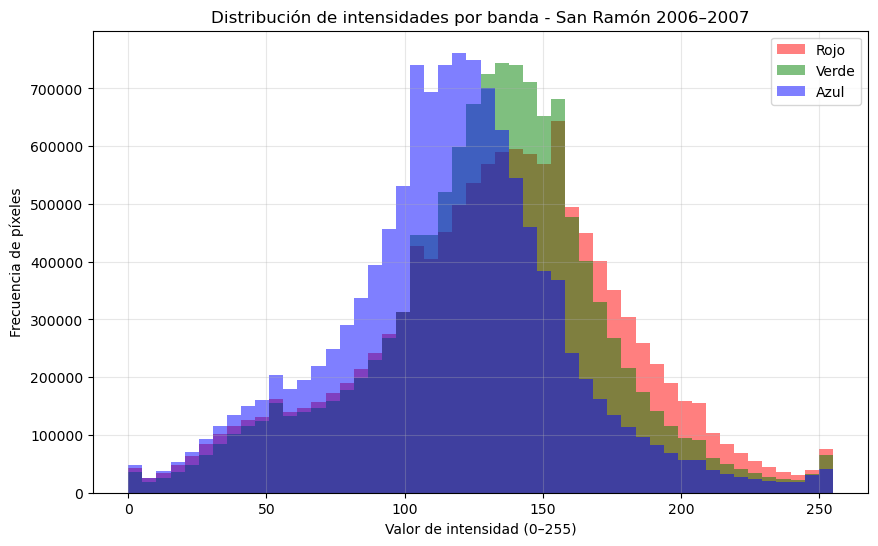

In [6]:
# Grafico de distribución de intensidades por banda - San Ramón 2006-2007

with rasterio.open(ruta06) as src:
    red = src.read(1).ravel()
    green = src.read(2).ravel()
    blue = src.read(3).ravel()

plt.figure(figsize=(10,6))
plt.hist(red, bins=50, color='red', alpha=0.5, label='Rojo')
plt.hist(green, bins=50, color='green', alpha=0.5, label='Verde')
plt.hist(blue, bins=50, color='blue', alpha=0.5, label='Azul')
plt.title("Distribución de intensidades por banda - San Ramón 2006–2007")
plt.xlabel("Valor de intensidad (0–255)")
plt.ylabel("Frecuencia de píxeles")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Matriz de correlación entre bandas - San Ramón 2006-2007

with rasterio.open(ruta06) as src:
    R = src.read(1).astype('float32').ravel()
    G = src.read(2).astype('float32').ravel()
    B = src.read(3).astype('float32').ravel()

# Crear DataFrame
df = pd.DataFrame({'Rojo': R, 'Verde': G, 'Azul': B}).sample(50000)  

# Calcular correlación
corr = df.corr()

fig = px.imshow(corr,
                text_auto=True,
                color_continuous_scale='RdBu_r',
                title="Matriz de correlación entre bandas (San Ramón 2006–2007)")
fig.update_layout(width=500, height=400)
fig.show()

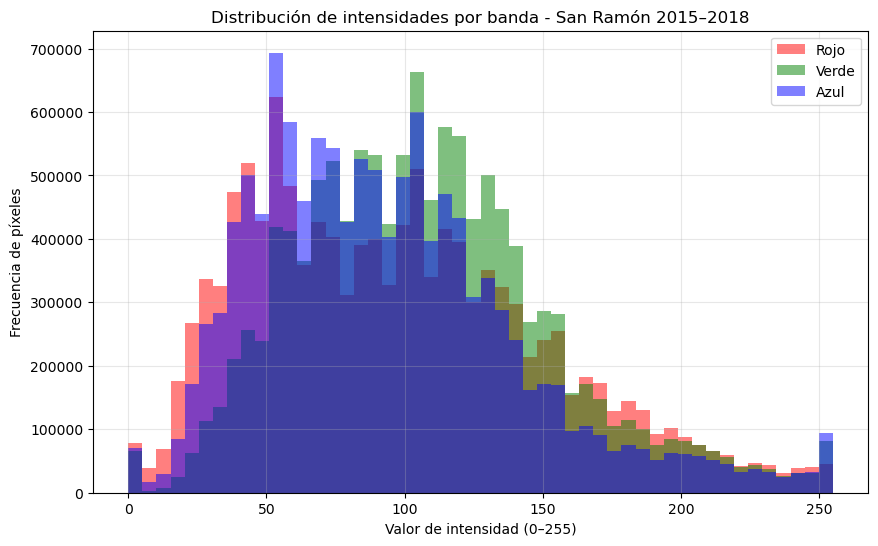

In [8]:
# Grafico de distribución de intensidades por banda - San Ramón 2015-2018

with rasterio.open(ruta15) as src:
    red = src.read(1).ravel()
    green = src.read(2).ravel()
    blue = src.read(3).ravel()

plt.figure(figsize=(10,6))
plt.hist(red, bins=50, color='red', alpha=0.5, label='Rojo')
plt.hist(green, bins=50, color='green', alpha=0.5, label='Verde')
plt.hist(blue, bins=50, color='blue', alpha=0.5, label='Azul')
plt.title("Distribución de intensidades por banda - San Ramón 2015–2018")
plt.xlabel("Valor de intensidad (0–255)")
plt.ylabel("Frecuencia de píxeles")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Matriz de correlación entre bandas - San Ramón 2015-2018

with rasterio.open(ruta15) as src:
    R = src.read(1).astype('float32').ravel()
    G = src.read(2).astype('float32').ravel()
    B = src.read(3).astype('float32').ravel()

# Crear DataFrame
df = pd.DataFrame({'Rojo': R, 'Verde': G, 'Azul': B}).sample(50000) 

# Calcular correlación
corr = df.corr()

fig = px.imshow(corr,
                text_auto=True,
                color_continuous_scale='RdBu_r',
                title="Matriz de correlación entre bandas (San Ramón 2015–2018)")
fig.update_layout(width=500, height=400)
fig.show()

### Dos mapas elaborados con Matplotlib o con el método explore() de GeoPandas que le ayuden a describir el conjunto de datos.

Para entender mejor el conjunto de datos, se generan dos gráficos, el primero muestra la data de San Ramón 2006-2007 con indicacion del Norte y una escala de distancia. El segundo gráfico, muestra de manera interactiva la ubicación del conjunto de datos respecto al país de Costa Rica.

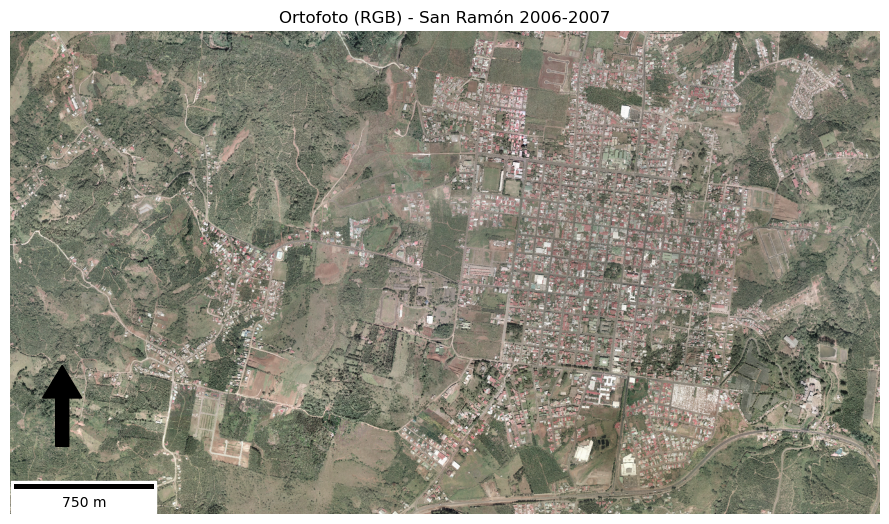

In [ ]:
# Visualización de la imagen RGB con flecha norte y barra de escala

tif_path = "SanRamon_06-07.tif"  

with rasterio.open(tif_path) as src:
    rgb = src.read([1,2,3])         
    transform = src.transform
    crs = src.crs

fig, ax = plt.subplots(figsize=(9,9))
show(rgb, transform=transform, ax=ax)
ax.set_axis_off()
ax.set_title("Ortofoto (RGB) - San Ramón 2006-2007")

# Flecha norte (esquemática en coordenadas del eje)
ax.add_patch(FancyArrow(0.06, 0.14, 0, 0.10, width=0.015,
                        transform=ax.transAxes, color='k'))
ax.text(0.06, 0.26, 'N', transform=ax.transAxes, ha='center', fontsize=12)


ax.add_artist(ScaleBar(1, units="m", dimension="si-length", location='lower left'))

plt.tight_layout()
plt.show()

In [11]:
# Visualización de huellas de cobertura de los ortofotos

tif_2006 = "SanRamon_06-07.tif"
tif_2015 = "SanRamon_15-18.tif"

def raster_bounds_gdf(path):
    with rasterio.open(path) as src:
        b = src.bounds
        crs = src.crs
    poly = box(b.left, b.bottom, b.right, b.top)
    return gpd.GeoDataFrame({"name":[path]}, geometry=[poly], crs=crs)

fp06 = raster_bounds_gdf(tif_2006)
fp15 = raster_bounds_gdf(tif_2015)

# reproyectar a WGS84 para tiles web
fp06w = fp06.to_crs(4326)
fp15w = fp15.to_crs(4326)
fp06w["Periodo"] = "2006–2007"
fp15w["Periodo"] = "2015–2018"

m = fp06w.explore(tiles="CartoDB.Positron",
                  color="#1f77b4", style_kwds={"fillOpacity":0.1, "weight":3},
                  tooltip=["Periodo","name"], name="Footprint 2006–2007")
m = fp15w.explore(m=m,
                  color="#d62728", style_kwds={"fillOpacity":0.1, "weight":3, "dashArray":"5,5"},
                  tooltip=["Periodo","name"], name="Footprint 2015–2018")
m